In [0]:

import pandas
import numpy as np


#from google.colab import files
#uploaded = files.upload()


df = pandas.read_csv('StaticPastePrices_fixedv3.csv', header=None)
#print(df)

seed = df[df.columns[0:2]]
seed.columns = ['date', 'stock price ' + str(1) ]
seed = seed.dropna(axis = 0, how = 'any')
seed.date = pandas.to_datetime(seed.date)
#print(seed)

for i in range(1,173):

  adden = df[df.columns[2*i:2*i+2]]

  adden.columns = ['date', 'stock price ' + str(i+1) ]
  adden = adden.dropna(axis = 0, how = 'any')
  adden.date = pandas.to_datetime(adden.date, errors ='coerce')
  if i == 164:
    print(adden)
  seed = pandas.merge(seed, adden, on='date', how='outer' )
  
seed.dropna(axis = 0, how ='all')
seed.date = pandas.to_datetime(seed.date, errors ='coerce')
seed = seed.sort_values(by = 'date')
print(seed)




         date  stock price 165
0  2001-08-08            0.295
1  2001-10-04            0.295
2  2001-10-05            0.295
3  2001-10-08            0.295
4  2001-10-09            0.295
5  2001-10-10            0.295
6  2001-10-11            0.295
7  2001-10-12            0.295
8  2001-10-15            0.295
9  2001-10-16            0.295
10 2001-10-17            0.295
11 2001-10-18            0.300
12 2001-10-19            0.295
13 2001-10-22            0.295
14 2001-10-23            0.295
15 2001-10-24            0.295
16 2001-10-25            0.295
17 2001-10-26            0.295
18 2001-10-29            0.295
19 2001-10-30            0.295
20 2001-10-31            0.295
21 2001-11-01            0.295
22 2001-11-02            0.295
23 2001-11-05            0.295
24 2001-11-06            0.295
25 2001-11-07            0.295
26 2001-11-08            0.295
27 2001-11-09            0.295
28 2001-11-12            0.295
29 2001-11-13            0.295
..        ...              ...
42 2001-

In [0]:


from google.colab import files

seed.to_csv('dataframe.csv')

files.download('dataframe.csv')

In [0]:
##finding out equal weighted return series w/o transaction costs
myDf = seed

ew_log_ret = np.zeros(3548)
mydates = []

for i in range(0, 3546):

  today = myDf[i:i+2]
  mydates.append(today.date.iloc[0])
  #print(mydates[i])
  today = today.dropna(axis = 1, how ='any') #remove any stock we don't have today and yesterday's info for
   
  n = len(today.columns) - 1 #how many active deals there are today
  #print(today)

  if(n > 0):
    nxt = today[today.columns[1:n+1]]

    after = np.array(nxt.iloc[1])
    prev = np.array(nxt.iloc[0])

    dif = np.log(np.divide(after, prev)) #get log return for each security this period
    ew_log_ret[i] = np.average(dif) #average log return for equal weight portfolio

ew_ret = np.zeros(3546)
sum = 0

for i in range(0, 3546):
  sum = sum + ew_log_ret[i]
  ew_ret[i] = np.exp(sum)

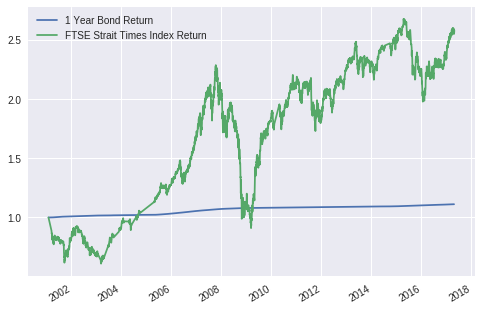

Mean Log Return: 0.13610823666905864
Standard Deviation of log return: 0.21184775286976754
Maximum Drawdown: 0.1918365753833089
0.6341692629958428
Mean Log Return Index: 0.007532390328620351
Standard Deviation of log return Index: 0.0003736412179049319
Index DD: 0.09796328191572921
3548


NameError: ignored

In [0]:


import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

#plt.plot(mydates, ew_ret, label = "Equal Weight Portfolio Return")
plt.plot(mydates, bond_ret, label = "1 Year Bond Return")
plt.plot( np.array(myindex['date']), np.divide(np.array(myindex['StraitTimes']), np.array(myindex['StraitTimes'])[0]), label = "FTSE Strait Times Index Return" )
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.show()

sgxindex = np.divide(np.array(myindex['StraitTimes']), np.array(myindex['StraitTimes'])[0])

print("Mean Log Return: " + str(np.mean(ew_log_ret)*252))
print("Standard Deviation of log return: " + str(np.std(ew_log_ret)*np.sqrt(252)))


i = np.argmax(np.maximum.accumulate(ew_ret) - ew_ret) # end of the period
j = np.argmax(ew_ret[:i]) # start of period

print("Maximum Drawdown: " + str(1 - (ew_ret[i]/ew_ret[j])))

print(np.min(ew_ret[1500:2000])/np.max(ew_ret[1:1500]))

index_log = (np.log(np.divide(sgxindex[1:],sgxindex[0:3546])))

print("Mean Log Return Index: " + str(np.mean(bond_log_ret)*252))
print("Standard Deviation of log return Index: " + str(np.std(bond_log_ret)*np.sqrt(252)))


print("Index DD: " + str(np.min(bond_log_ret[1500:2000])/np.max(bond_log_ret[1:1500])))



print(len(ew_log_ret))
#d = {'bond': bond_log_ret[0:3546], 'myindex': index_log}
#adf = pandas.DataFrame(data=d)
 # with sklearn
#regr = linear_model.LinearRegression()

#x = np.exp((index_log -bond_log_ret[0:3546])) - np.ones(3546)
#y = np.exp(ew_log_ret[0:3546] - bond_log_ret[0:3546])
#y = y - np.ones(3546)
#regr.fit(x,y)
print(x)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)


In [0]:
print(y)
regr.fit(x.reshape(-1, 1),y.reshape(-1, 1))
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


[-4.90069834e-05 -5.83762151e-05 -5.83762151e-05 ...  3.83182946e-03
 -2.90621958e-05 -3.87510426e-03]
Intercept: 
 [0.00060016]
Coefficients: 
 [[0.00158904]]


In [0]:
#from google.colab import files
#uploaded = files.upload()


bond = pandas.read_csv('BondYield.csv')
bond.columns = ['Year', 'Month', 'date', 'yield' ]
bond.date = pandas.to_datetime(bond.date)

#print(bond)
#print(mydates[5].year)

rate = np.array(bond['yield'])
#print(mydates[5])

In [0]:
##finding out practitional weighted return series w/o transaction costs
myDf = seed


pr_log_ret = np.zeros(3548)

bond_log_ret = np.zeros(3548)


mydates = []

for i in range(0, 3546):

  today = myDf[i:i+2]
  today = today.dropna(axis = 1, how ='any') #remove any stock we don't have today and yesterday's info for
  mydates.append(today.date.iloc[0])
   
  n = len(today.columns) - 1 #how many active deals there are today
  #print(today)
  
  trsy = np.log((100 + rate[mydates[i].month + 12*(mydates[i].year - 2001) - 1])/100)/356    
  bond_log_ret[i] = trsy
  
  if(n > 0):
    nxt = today[today.columns[1:n+1]]

    after = np.array(nxt.iloc[1])
    prev = np.array(nxt.iloc[0])
    dif = np.log(np.divide(after, prev)) #get log return for each security this period

    if(n > 10):
      pr_log_ret[i] = np.average(dif) #average log return for equal weight portfolio
    else:
      #treasury yearly log return
      trsy = np.log((100 + rate[mydates[i].month + 12*(mydates[i].year - 2001) - 1])/100)/356    
      #print(trsy)
      pr_log_ret[i] = np.average(dif)*(n/10) +  (trsy)*((10-n)/10)

      
pr_ret = np.zeros(3546)
bond_ret = np.zeros(3546)
sum = 0
sumb = 0 

for i in range(0, 3546):
  sum = sum + pr_log_ret[i]
  sumb = sumb + bond_log_ret[i]
  pr_ret[i] = np.exp(sum)
  bond_ret[i] = np.exp(sumb)

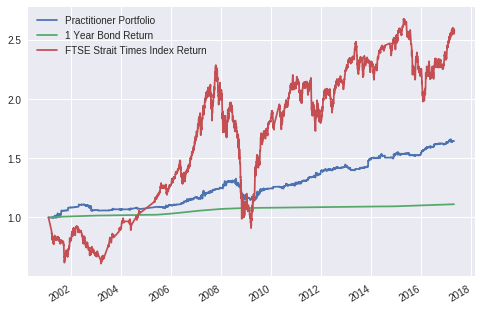

0.00014023593816934899


In [0]:
import matplotlib.pyplot as plt

plt.plot(mydates, pr_ret, label = "Practitioner Portfolio")
plt.plot(mydates, bond_ret, label = "1 Year Bond Return")
plt.plot( np.array(myindex['date']), np.divide(np.array(myindex['StraitTimes']), np.array(myindex['StraitTimes'])[0]), label = "FTSE Strait Times Index Return" )
plt.legend(loc='best')

plt.gcf().autofmt_xdate()
plt.show()
print(np.mean(pr_log_ret))

#regr = linear_model.LinearRegression()

#x = np.exp((index_log -bond_log_ret[0:3546])) - np.ones(3546)
#y = np.exp(ew_log_ret[0:3546] - bond_log_ret[0:3546])
#y = y - np.ones(3546)

In [0]:
print("Mean Log Return: " + str(np.mean(pr_log_ret)*252))
print("Standard Deviation of log return: " + str(np.std(pr_log_ret)*np.sqrt(252)))


i = np.argmax(np.maximum.accumulate(pr_ret) - pr_ret) # end of the period
j = np.argmax(pr_ret[:i]) # start of period

print("Maximum Drawdown: " + str((1 - pr_ret[i]/pr_ret[j])))



Mean Log Return: 0.035339456418675946
Standard Deviation of log return: 0.04511343795588243
Maximum Drawdown: 0.13958840480151724


In [0]:
import re
#for value weighted portfolio

#from google.colab import files
#uploaded = files.upload()


spreads = pandas.read_csv('equitySpread.csv')

#print(spreads)

#print(today)



##finding out value weighted return series w/o transaction costs
myDf = seed

vw_log_ret = np.zeros(3548)
mydates = []

for i in range(0, 3546):

  today = myDf[i:i+2]
  today = today.dropna(axis = 1, how ='any') #remove any stock we don't have today and yesterday's info for
  mydates.append(today.date.iloc[0])
   
  n = len(today.columns) - 1 #how many active deals there are today
  #print(today)
    
  theseStocks = today.columns.values[1:]
  
  
  
  
  if(n > 0):
    nxt = today[today.columns[1:n+1]]
    sums = np.zeros(n)
    totals = 0
    
    after = np.array(nxt.iloc[1])
    prev = np.array(nxt.iloc[0])
    dif = np.log(np.divide(after, prev)) #get log return for each security this period
  
    for j in range(0, n):
        stockStr =  theseStocks[j]
        equityIndex = int(re.search(r'\d+', stockStr).group())
        sums[j] = float(dif[j])*float((spreads.equity[equityIndex - 1]))
        totals = totals + (spreads.equity[equityIndex - 1])
    #print(sums)
    vw_log_ret[i] = np.sum(np.divide(sums, totals)) #average log return for equal weight portfolio

      
vw_ret = np.zeros(3546)
sum = 0

for i in range(0, 3546):
  sum = sum + vw_log_ret[i]
  vw_ret[i] = np.exp(sum)



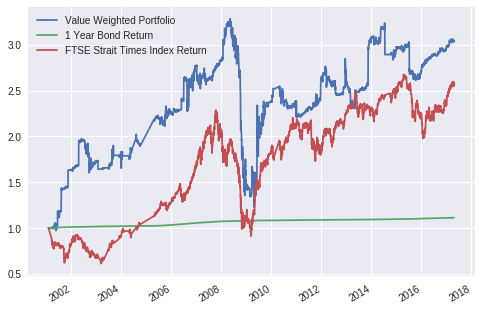

Mean Log Return: 0.07882798704439821
Standard Deviation of log return: 0.2354103376123253
Maximum Drawdown: 0.6266060564099172


NameError: ignored

In [0]:
import matplotlib.pyplot as plt

plt.plot(mydates, vw_ret, label ="Value Weighted Portfolio")
plt.plot(mydates, bond_ret, label = "1 Year Bond Return")
plt.plot( np.array(myindex['date']), np.divide(np.array(myindex['StraitTimes']), np.array(myindex['StraitTimes'])[0]), label = "FTSE Strait Times Index Return" )
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.show()



print("Mean Log Return: " + str(np.mean(vw_log_ret)*252))
print("Standard Deviation of log return: " + str(np.std(vw_log_ret)*np.sqrt(252)))


i = np.argmax(np.maximum.accumulate(vw_ret) - vw_ret) # end of the period
j = np.argmax(vw_ret[:i]) # start of period

print("Maximum Drawdown: " + str((1 - vw_ret[i]/vw_ret[j])))

regr = linear_model.LinearRegression()

x = np.exp((index_log -bond_log_ret[0:3546])) - np.ones(3546)
y = np.exp(vw_log_ret[0:3546] - bond_log_ret[0:3546])
y = y - np.ones(3546)

print(y)
regr.fit(x.reshape(-1, 1),y.reshape(-1, 1))
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


In [0]:
#for log value weighted portfolio

#from google.colab import files
#uploaded = files.upload()


spreads = pandas.read_csv('equitySpread.csv')

#print(spreads)

#print(today)



##finding out value weighted return series w/o transaction costs
myDf = seed

lvw_log_ret = np.zeros(3548)
mydates = []

for i in range(0, 3546):

  today = myDf[i:i+2]
  today = today.dropna(axis = 1, how ='any') #remove any stock we don't have today and yesterday's info for
  mydates.append(today.date.iloc[0])
   
  n = len(today.columns) - 1 #how many active deals there are today
  #print(today)
    
  theseStocks = today.columns.values[1:]
  
  
  
  
  if(n > 0):
    nxt = today[today.columns[1:n+1]]
    sums = np.zeros(n)
    totals = 0
    
    after = np.array(nxt.iloc[1])
    prev = np.array(nxt.iloc[0])
    dif = np.log(np.divide(after, prev)) #get log return for each security this period
  
    for j in range(0, n):
        stockStr =  theseStocks[j]
        equityIndex = int(re.search(r'\d+', stockStr).group())
        sums[j] = float(dif[j])*float(np.log(spreads.equity[equityIndex - 1]))
        totals = totals + np.log(spreads.equity[equityIndex - 1])
    #print(sums)
    lvw_log_ret[i] = np.sum(np.divide(sums, totals)) #average log return for equal weight portfolio

      
lvw_ret = np.zeros(3546)
sum = 0

for i in range(0, 3546):
  sum = sum + lvw_log_ret[i]
  lvw_ret[i] = np.exp(sum)



In [0]:

print("Mean Log Return: " + str(np.mean(lvw_log_ret)*252))
print("Standard Deviation of log return: " + str(np.std(lvw_log_ret)*np.sqrt(252)))


i = np.argmax(np.maximum.accumulate(lvw_ret) - lvw_ret) # end of the period
j = np.argmax(lvw_ret[:i]) # start of period

print("Maximum Drawdown: " + str((1 - lvw_ret[i]/lvw_ret[j])))


Mean Log Return: 0.12696030233906228
Standard Deviation of log return: 0.21264893940935592
Maximum Drawdown: 0.41610058868016875


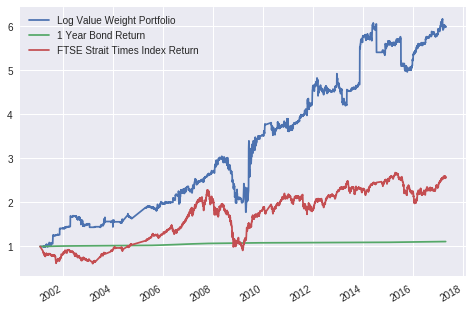

In [0]:
import matplotlib.pyplot as plt

plt.plot(mydates, lvw_ret, label = "Log Value Weight Portfolio")
plt.plot(mydates, bond_ret, label = "1 Year Bond Return")
plt.plot( np.array(myindex['date']), np.divide(np.array(myindex['StraitTimes']), np.array(myindex['StraitTimes'])[0]), label = "FTSE Strait Times Index Return" )
plt.legend(loc='best')

plt.gcf().autofmt_xdate()
plt.show()


In [0]:

from google.colab import files
uploaded = files.upload()


myindex = pandas.read_csv('StraitTimes.csv')
myindex.date = pandas.to_datetime(myindex.date)

print(myindex)


Saving StraitTimes.csv to StraitTimes.csv
           date  StraitTimes
0    2001-01-31  1668.490000
1    2001-03-16  1481.480000
2    2001-03-19  1438.790000
3    2001-03-20  1446.200000
4    2001-03-21  1443.110000
5    2001-03-22  1407.350000
6    2001-03-23  1432.700000
7    2001-03-26  1428.030000
8    2001-03-27  1391.290000
9    2001-03-28  1373.920000
10   2001-03-29  1353.020000
11   2001-03-30  1391.250000
12   2001-04-02  1369.760000
13   2001-04-03  1365.990000
14   2001-04-04  1349.420000
15   2001-04-05  1393.570000
16   2001-04-06  1388.930000
17   2001-04-09  1322.070000
18   2001-04-10  1327.480000
19   2001-04-11  1333.830000
20   2001-04-12  1305.090000
21   2001-04-16  1311.500000
22   2001-04-17  1290.650000
23   2001-04-18  1321.990000
24   2001-04-19  1355.710000
25   2001-04-20  1362.240000
26   2001-04-23  1388.380000
27   2001-04-24  1386.280000
28   2001-04-25  1371.880000
29   2001-04-26  1365.670000
...         ...          ...
3517 2017-03-14  4265.081780
3

In [0]:
print(spreads)

      equity  deal price
0     200.71        0.25
1    1278.10        1.78
2    1046.80        1.30
3     238.48        1.01
4     807.28        1.08
5    1894.75        1.68
6     196.15        0.60
7    1344.21        1.02
8     243.72        0.85
9     328.28        0.75
10    809.81        1.39
11     37.81        0.03
12     60.74        0.20
13    327.76        0.82
14   2420.81        1.30
15    728.36        0.45
16     45.23        0.43
17     47.92        0.24
18   5277.17        4.60
19    191.32        0.32
20    260.49        0.33
21     77.77        0.24
22    284.58        0.55
23    391.03        1.16
24   1230.40        0.83
25    775.16        0.47
26    438.82        2.25
27    263.22        1.25
28    429.86        1.08
29     43.74        0.24
..       ...         ...
143    41.35        0.28
144    21.06        0.20
145    65.81        1.00
146    79.84        0.62
147   107.20        2.45
148   418.70        2.05
149   658.10        4.76
150   874.80        1.10


In [0]:
firstDay = np.zeros(173)

junk = np.array(df[0:1])
firstDates = []


for i in range(0, 173):
  firstDay[i] = junk[0, 2*i + 1]
  firstDates.append(junk[0, 2*i])
  
#print(np.divide(firstDay, np.array(spreads['deal price'])))
#print(np.where(firstDates > '2000-6-1'))

#df = pd.DataFrame(np.random.random((200,3)))
#df['date'] = pd.date_range('2000-1-1', periods=200, freq='D')
#mask = (df['date'] > '2000-6-1') & (df['date'] <= '2000-6-10')
#print(df.loc[mask])
print(firstDates)

['11/14/2016', '11/9/2016', '11/3/2016', '10/26/2016', '8/10/2016', '7/21/2016', '5/16/2016', '5/10/2016', '4/22/2016', '3/28/2016', '3/8/2016', '2/25/2016', '12/31/2015', '12/23/2015', '12/8/2015', '11/6/2015', '9/23/2015', '9/2/2015', '1/26/2015', '1/15/2015', '1/15/2015', '12/30/2014', '12/12/2014', '11/18/2014', '11/13/2014', '11/7/2014', '11/4/2014', '10/7/2014', '9/26/2014', '6/4/2014', '4/15/2014', '4/15/2014', '3/14/2014', '3/14/2014', '2/24/2014', '1/23/2014', '11/13/2013', '10/14/2013', '10/8/2013', '9/30/2013', '7/8/2013', '7/8/2013', '6/24/2013', '5/13/2013', '1/31/2013', '12/21/2012', '12/6/2012', '9/13/2012', '8/27/2012', '8/10/2012', '8/2/2012', '7/23/2012', '6/28/2012', '6/1/2012', '5/10/2012', '4/3/2012', '3/16/2012', '3/6/2012', '12/29/2011', '11/9/2011', '10/31/2011', '10/10/2011', '10/5/2011', '9/14/2011', '8/24/2011', '7/13/2011', '6/17/2011', '6/16/2011', '6/2/2011', '5/24/2011', '5/4/2011', '3/16/2011', '3/7/2011', '1/20/2011', '1/7/2011', '12/6/2010', '11/16/201